### Initial Plots

In [1]:
import numpy as np
import xarray as xr
import csv
import pandas as pd
import math
import sys

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm

import functions_py.fates_xarray_functions as fa

In [51]:
fates = '/Users/sharmiladey/Desktop/bci_p0.Eb645be3aa2-F46cf01a4.2023-05-10.elm.h0.example_run.nc'
fates = xr.open_dataset(fates, decode_times=False)

time = (fates.variables['time'].isel(time=slice(25,100)) / 365) - 10

ngtpa_chn = pd.read_csv('/Users/sharmiladey/Desktop/NGT0173_PA-SLZ_LeafTraits_20210611183226/PA-SLZ_2020_CHN_LMA_data.csv')
#print(ngtpa_chn)

ngtpa_sd = pd.read_csv('/Users/sharmiladey/Desktop/NGT0173_PA-SLZ_LeafTraits_20210611183226/PA-SLZ_2020_SampleDetails.csv')
#print(ngtpa_sd)

ngtpa = pd.merge(ngtpa_chn, ngtpa_sd, on=["SampleID"])
#print(ngtpa.shape)

ngtpa_lai = pd.read_csv('/Users/sharmiladey/Desktop/NGT0173_PA-SLZ_LeafTraits_20210611183226/PA-SLZ_2020_Vertical_Profiles_LAI_Height.csv')

ngtpa = pd.merge(ngtpa, ngtpa_lai, on=["Vertical_Profile", "Vertical_Elevation"])

tses = pd.read_csv("/Users/sharmiladey/Desktop/Data_Vertical_Profiles.csv")
tses = tses[(tses.Life_form != "LIANA") & (tses.Life_form != "HEMIEPIPHYTIC VINE") & (tses.Life_form != "HERB") & (tses.Life_form) & (tses.LAI) & (tses.Rdark25) & (tses.Vcmax25)]

print(fates.data_vars)

Data variables:
    fates_scmap_levscag               (fates_levscag) int32 ...
    fates_agmap_levscag               (fates_levscag) int32 ...
    fates_pftmap_levscpf              (fates_levscpf) int32 ...
    fates_scmap_levscpf               (fates_levscpf) int32 ...
    fates_pftmap_levcapf              (fates_levcapf) int32 ...
    fates_camap_levcapf               (fates_levcapf) int32 ...
    fates_levleaf                     (lndgrid) int32 ...
    fates_canmap_levcnlf              (fates_levcnlf) int32 ...
    fates_lfmap_levcnlf               (fates_levcnlf) int32 ...
    fates_canmap_levcnlfpf            (fates_levcnlfpf) int32 ...
    fates_lfmap_levcnlfpf             (fates_levcnlfpf) int32 ...
    fates_pftmap_levcnlfpf            (fates_levcnlfpf) int32 ...
    fates_scmap_levscagpft            (fates_levscagpf) int32 ...
    fates_agmap_levscagpft            (fates_levscagpf) int32 ...
    fates_pftmap_levscagpft           (fates_levscagpf) int32 ...
    fates_pftmap_l

In [3]:
#print(ngtpa)

#### Nscaler vs cumulative LAI

[0 1 2 3 4 5 6 7 8 9]


Text(0.5, 0, 'Cumulative LAI')

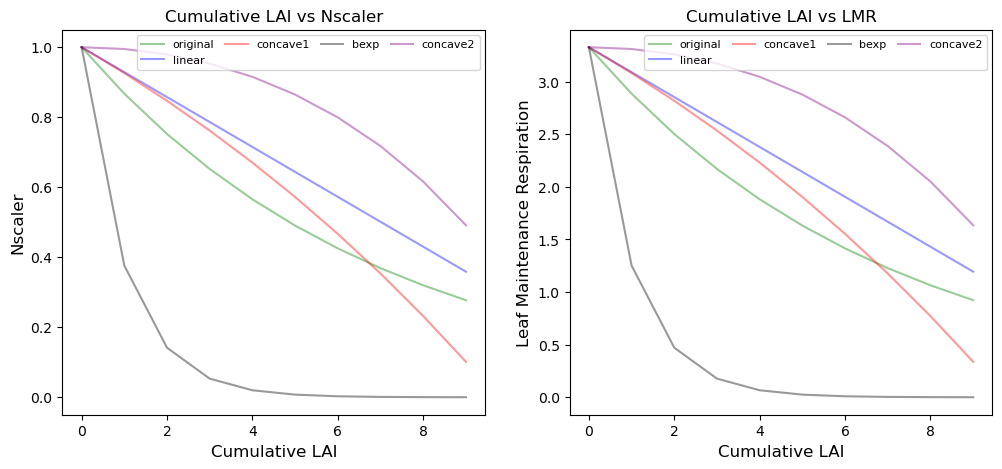

In [59]:
#Original LAI vs Nscaler
exp0 = (0.00963 * 50 - 2.43)
kn0 = pow(math.e, exp0)
cumulative_lai0 = np.array(range(0,10)) 
nscaler0 = math.e ** (-kn0 * cumulative_lai0)

lnc_top0  = 0.033/0.012

r_t_ref0 = nscaler0 * (1.7560 + 0.2061 * lnc_top0 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr0 = r_t_ref0 * (math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2)))

#---------------------
#LAI vs Nscaler linear
exp1 = (0.00963 * 50 - 2.43)
kn1 = pow(math.e, exp1)
cumulative_lai1 = np.array(range(0,10)) 
nscaler1 = (-kn1 * cumulative_lai1)/2 + 1

lnc_top1  = 0.033/0.012

r_t_ref1 = nscaler1 * (1.7560 + 0.2061 * lnc_top1 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr1 = r_t_ref1 * math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2))

#---------------------
#LAI vs Nscaler concave1
exp2 = (0.00963 * 50 - 2.43)
kn2 = pow(math.e, exp2)
cumulative_lai2 = np.array(range(0,10)) 
nscaler2 = -math.e ** (.5*kn2 * cumulative_lai2)+2

lnc_top2  = 0.033/0.012

r_t_ref2 = nscaler2 * (1.7560 + 0.2061 * lnc_top2 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr2 = r_t_ref2 * math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2))

#---------------------
#LAI vs Nscaler bigger exponent
exp3 = (0.00963 * 250 - 2.43)
kn3 = pow(math.e, exp3)
cumulative_lai3 = np.array(range(0,10)) 
nscaler3 = math.e ** (-kn3 * cumulative_lai3)

lnc_top3  = 0.033/0.012

r_t_ref3 = nscaler3 * (1.7560 + 0.2061 * lnc_top3 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr3 = r_t_ref3 * math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2))

#---------------------
#LAI vs Nscaler concave2
exp4 = (0.00963 * 50 - 2.43)
kn4 = pow(math.e, exp4)
cumulative_lai4 = np.array(range(0,10)) 
nscaler4 = -math.e ** pow(0.5*kn4 * cumulative_lai4, 2)+2

lnc_top4  = 0.033/0.012

r_t_ref4 = nscaler4 * (1.7560 + 0.2061 * lnc_top4 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr4 = r_t_ref4 * math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2))

#ngtpa_eq = -0.1541*x^2 + 0.03091*x + 2.572

fig1, (f1ax0, f1ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

f1ax0.plot(cumulative_lai0, nscaler0, color='green', label='original', alpha=0.4)
f1ax0.plot(cumulative_lai1, nscaler1, color='blue', label='linear', alpha=0.4)
f1ax0.plot(cumulative_lai2, nscaler2, color='red', label='concave1', alpha=0.4)
f1ax0.plot(cumulative_lai3, nscaler3, color='black', label='bexp', alpha=0.4)
f1ax0.plot(cumulative_lai4, nscaler4, color='purple', label='concave2', alpha=0.4)
f1ax0.legend(loc='upper right', ncols=4, fontsize = 8, columnspacing = 1, alignment='right')
f1ax0.set_title(r'Cumulative LAI vs Nscaler', fontsize=12)
f1ax0.set_ylabel(r'Nscaler', fontsize=12)
f1ax0.set_xlabel(r'Cumulative LAI', fontsize=12)

f1ax1.plot(cumulative_lai0, lmr0, color='green', label='original', alpha=0.4)
f1ax1.plot(cumulative_lai1, lmr1, color='blue', label='linear', alpha=0.4)
f1ax1.plot(cumulative_lai2, lmr2, color='red', label='concave1', alpha=0.4)
f1ax1.plot(cumulative_lai3, lmr3, color='black', label='bexp', alpha=0.4)
f1ax1.plot(cumulative_lai4, lmr4, color='purple', label='concave2', alpha=0.4)
f1ax1.legend(loc='upper right', ncols=4, fontsize=8, columnspacing=1, alignment='right')
f1ax1.set_title(r'Cumulative LAI vs LMR', fontsize=12)
f1ax1.set_ylabel(r'Leaf Maintenance Respiration', fontsize=12)
f1ax1.set_xlabel(r'Cumulative LAI', fontsize=12)

### TSES Height vs LAI, Height vs rdark

            2
-0.0002851 x - 0.09739 x + 1.009


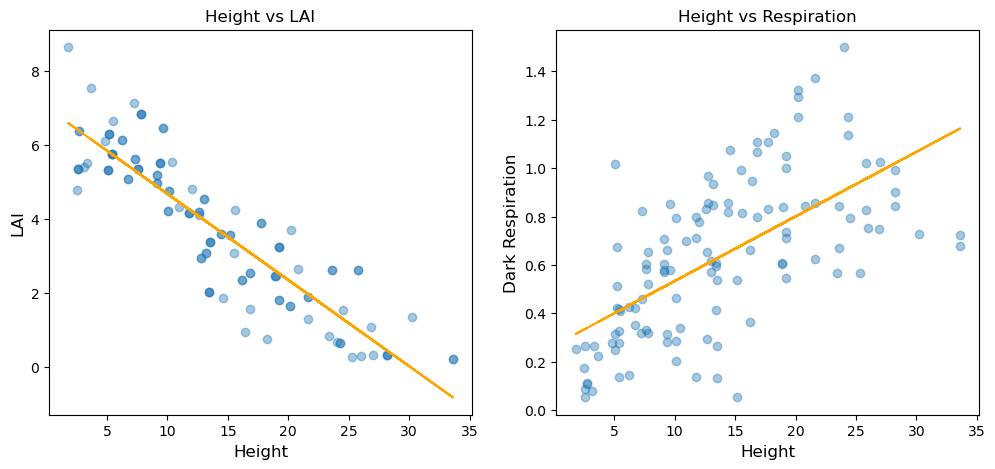

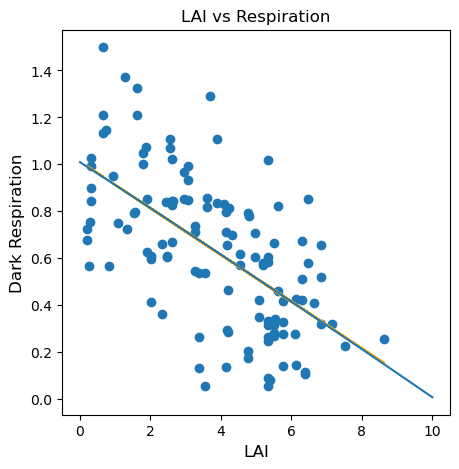

In [52]:
height = tses["Height"]
lai = tses["LAI"]
rdark = tses["Rdark25"]

a, b = np.polyfit(height, lai, 1)
c, d = np.polyfit(height, rdark, 1)
e, f = np.polyfit(lai, rdark, 1)
model = np.poly1d(np.polyfit(lai, rdark, 2))

polyline = np.linspace(0, 10, 119)

fig1, (f1ax0, f1ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

f1ax0.scatter(height, lai, alpha=0.4)
f1ax0.plot(height, a*height+b, color="orange")
f1ax0.set_title(r'Height vs LAI', fontsize=12)
f1ax0.set_xlabel(r'Height', fontsize=12)
f1ax0.set_ylabel(r'LAI', fontsize=12)

f1ax1.scatter(height, rdark, alpha=0.4)
f1ax1.plot(height, c*height+d, color="orange")
f1ax1.set_title(r'Height vs Respiration', fontsize=12)
f1ax1.set_xlabel(r'Height', fontsize=12)
f1ax1.set_ylabel(r'Dark Respiration', fontsize=12)

fig2, (f1ax2) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

f1ax2.scatter(lai, rdark)
f1ax2.plot(lai, e*lai+f, color="orange")
f1ax2.plot(polyline, model(polyline))
f1ax2.set_title(r'LAI vs Respiration', fontsize=12)
f1ax2.set_xlabel(r'LAI', fontsize=12)
f1ax2.set_ylabel(r'Dark Respiration', fontsize=12)

print(model)

### Vmax through canopy

1.0
         2
-0.2557 x - 2.447 x + 72.72


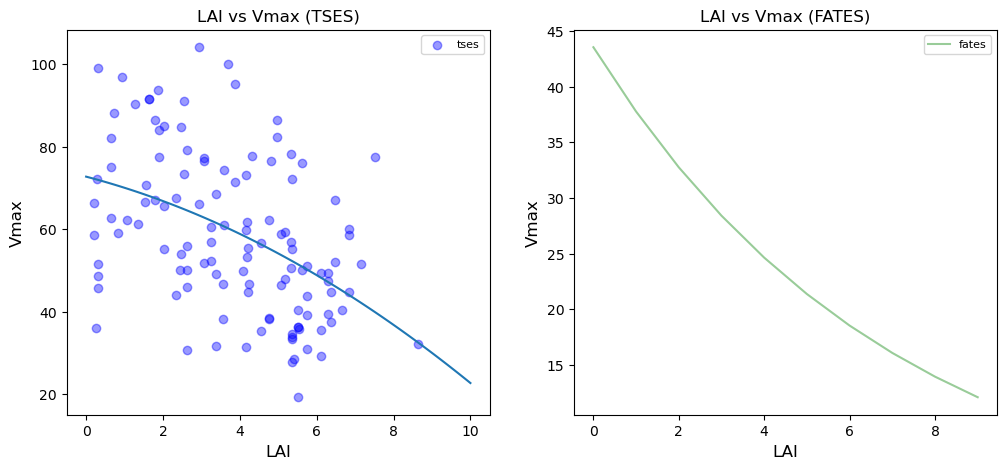

In [92]:
#tses
tvmax = tses["Vcmax25"]
lai = tses["LAI"]

model = np.poly1d(np.polyfit(lai, tvmax, 2))
polyline = np.linspace(0, 10, 119)

#fates
exp0 = (0.00963 * 50 - 2.43)
kn0 = pow(math.e, exp0)
cumulative_lai = np.array(range(0,10)) 
nscaler = math.e ** (-kn0 * cumulative_lai)
print(nscaler[0])

t_growth_celsius = 25
t_home_celsius = 25
tfrz = 273.15
veg_tempk = 298.15
rgas = 8314.4598
vcmaxha = (42.6 + (1.14*t_growth_celsius))*1e3
vcmaxhd = 200*1e3
vcmaxse = (645.13 - (0.38*t_growth_celsius))

vcmaxc = 1 + pow(math.e, ((-vcmaxhd+vcmaxse*(tfrz+25)) / (rgas*1e-3*(tfrz+25))))
vcmax25 = 50 * nscaler

ft1_f = pow(math.e, (vcmaxha / (rgas*1e-3*(tfrz+25)) * (1 - (tfrz+25)/veg_tempk) ))
fth_f = vcmaxc / ( 1 + pow(math.e, ((-vcmaxhd+vcmaxse*veg_tempk) / (rgas*1e-3*veg_tempk))))

#ask about this
vcmax = vcmax25 * ft1_f * fth_f
vcmax = vcmax25 * 2**((veg_tempk-(tfrz+25))/10)

vcmax = vcmax / (1 + pow(math.e, (0.2*((tfrz+15)-veg_tempk))))
vcmax = vcmax / (1 + pow(math.e, (0.3*(veg_tempk-(tfrz+40)))))
fvcmax = vcmax

#figures
fig1, (f1ax0, f1ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

f1ax0.scatter(lai, tvmax, color='blue', label='tses', alpha=0.4)

#tses figure
f1ax0.legend(loc='upper right', ncols=4, fontsize = 8, columnspacing = 1, alignment='right')
f1ax0.plot(polyline, model(polyline))
f1ax0.set_title(r'LAI vs Vmax (TSES)', fontsize=12)
f1ax0.set_ylabel(r'Vmax', fontsize=12)
f1ax0.set_xlabel(r'LAI', fontsize=12)

#fates figure
f1ax1.plot(cumulative_lai, fvcmax, color='green', label='fates', alpha=0.4)
f1ax1.legend(loc='upper right', ncols=4, fontsize=8, columnspacing=1, alignment='right')
f1ax1.set_title(r'LAI vs Vmax (FATES)', fontsize=12)
f1ax1.set_ylabel(r'Vmax', fontsize=12)
f1ax1.set_xlabel(r'LAI', fontsize=12)

print(model)

### Ratios of respiration to photosynthesis

In [83]:
t_growth_celsius = 298.15
t_home_celsius = 298.15
tfrz = 273.15
veg_tempk = 298.15
rgas = 8314.4598
vcmaxha = (42.6 + (1.14*t_growth_celsius))*1e3
vcmaxhd = 200*1e3
vcmaxse = (645.13 - (0.38*t_growth_celsius))
vcmaxc = 1 + pow(math.e, ((-vcmaxhd+vcmaxse*(tfrz+25)) / (rgas*1e-3*(tfrz+25))))
jvr = 2.56 - (0.0375*t_home_celsius)-(0.0202*(t_growth_celsius-t_home_celsius))
ft1_f = pow(math.e, (vcmaxha / (rgas*1e-3*(273.15+25)) * (1 - (273.15+25)/veg_tempk) ))
fth_f = vcmaxc / ( 1 + pow(math.e, ((-vcmaxhd+vcmaxse*veg_tempk) / (rgas*1e-3*veg_tempk))))

# Original
exp0 = (0.00963 * 50 - 2.43)
kn0 = pow(math.e, exp0)
cumulative_lai0 = np.array(range(0,10)) 
nscaler0 = math.e ** (-kn0 * cumulative_lai0)

vcmax250 = 50 * nscaler0
jmax250 = vcmax250*jvr
vcmax0 = vcmax250 * ft1_f * fth_f
vcmax0 = vcmax250 * 2**((veg_tempk-(tfrz+25))/10)
vcmax0 = vcmax0 / (1 + pow(math.e, (0.2*((tfrz+15)-veg_tempk))))
vcmax0 = vcmax0 / (1 + pow(math.e, (0.3*(veg_tempk-(tfrz+40)))))

lnc_top0  = 0.033/0.012
r_t_ref0 = nscaler0 * (1.7560 + 0.2061 * lnc_top0 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr0 = r_t_ref0 * (math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2)))

print("Original:", (lmr0/vcmax0)[0])

#LAI vs Nscaler linear
exp1 = (0.00963 * 50 - 2.43)
kn1 = pow(math.e, exp1)
cumulative_lai1 = np.array(range(0,10)) 
nscaler1 = (-kn1 * cumulative_lai1)/2 + 1

lnc_top1  = 0.033/0.012

r_t_ref1 = nscaler1 * (1.7560 + 0.2061 * lnc_top1 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr1 = r_t_ref1 * math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2))

vcmax251 = 50 * nscaler1
jmax251 = vcmax251*jvr
vcmax1 = vcmax251 * ft1_f * fth_f
vcmax1 = vcmax251 * 2**((veg_tempk-(tfrz+25))/10)
vcmax1 = vcmax1 / (1 + pow(math.e, (0.2*((tfrz+15)-veg_tempk))))
vcmax1 = vcmax1 / (1 + pow(math.e, (0.3*(veg_tempk-(tfrz+40)))))

print("Linear:", (lmr1/vcmax1)[0])

#---------------------
#LAI vs Nscaler concave1
exp2 = (0.00963 * 50 - 2.43)
kn2 = pow(math.e, exp2)
cumulative_lai2 = np.array(range(0,10)) 
nscaler2 = -math.e ** (.5*kn2 * cumulative_lai2)+2

lnc_top2  = 0.033/0.012

r_t_ref2 = nscaler2 * (1.7560 + 0.2061 * lnc_top2 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr2 = r_t_ref2 * math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2))

vcmax252 = 50 * nscaler2
jmax252 = vcmax252*jvr
vcmax2 = vcmax252 * ft1_f * fth_f
vcmax2 = vcmax252 * 2**((veg_tempk-(tfrz+25))/10)
vcmax2 = vcmax2 / (1 + pow(math.e, (0.2*((tfrz+15)-veg_tempk))))
vcmax2 = vcmax2 / (1 + pow(math.e, (0.3*(veg_tempk-(tfrz+40)))))

print("Concave Lower:", (lmr2/vcmax2)[0])

#---------------------
#LAI vs Nscaler bigger exponent
exp3 = (0.00963 * 250 - 2.43)
kn3 = pow(math.e, exp3)
cumulative_lai3 = np.array(range(0,10)) 
nscaler3 = math.e ** (-kn3 * cumulative_lai3)

lnc_top3  = 0.033/0.012

r_t_ref3 = nscaler3 * (1.7560 + 0.2061 * lnc_top3 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr3 = r_t_ref3 * math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2))

vcmax253 = 50 * nscaler3
jmax253 = vcmax253*jvr
vcmax3 = vcmax253 * ft1_f * fth_f
vcmax3 = vcmax253 * 2**((veg_tempk-(tfrz+25))/10)
vcmax3 = vcmax3 / (1 + pow(math.e, (0.2*((tfrz+15)-veg_tempk))))
vcmax3 = vcmax3 / (1 + pow(math.e, (0.3*(veg_tempk-(tfrz+40)))))

print("Bigger Nscaler Exponent:", (lmr3/vcmax3)[0])

#---------------------
#LAI vs Nscaler concave2
exp4 = (0.00963 * 50 - 2.43)
kn4 = pow(math.e, exp4)
cumulative_lai4 = np.array(range(0,10)) 
nscaler4 = -math.e ** pow(0.5*kn4 * cumulative_lai4, 2)+2

lnc_top4  = 0.033/0.012

r_t_ref4 = nscaler4 * (1.7560 + 0.2061 * lnc_top4 + 0.0402 * max(0.0, (298.15 - 273.15)))
lmr4 = r_t_ref4 * math.e**(0.1012 * (298.15 - 273.15 - 25.0) + -0.0005 * ((298.15-273.15)**2 - 25.0**2))

vcmax254 = 50 * nscaler4
jmax254 = vcmax254*jvr
vcmax4 = vcmax254 * ft1_f * fth_f
vcmax4 = vcmax254 * 2**((veg_tempk-(tfrz+25))/10)
vcmax4 = vcmax4 / (1 + pow(math.e, (0.2*((tfrz+15)-veg_tempk))))
vcmax4 = vcmax4 / (1 + pow(math.e, (0.3*(veg_tempk-(tfrz+40)))))

print("Concave Higher:", (lmr4/vcmax4)[0])

Original: 0.0764022344097636
Linear: 0.0764022344097636
Concave Lower: 0.0764022344097636
Bigger Nscaler Exponent: 0.0764022344097636
Concave Higher: 0.0764022344097636


### NGEE-Tropics Data LAI vs Narea

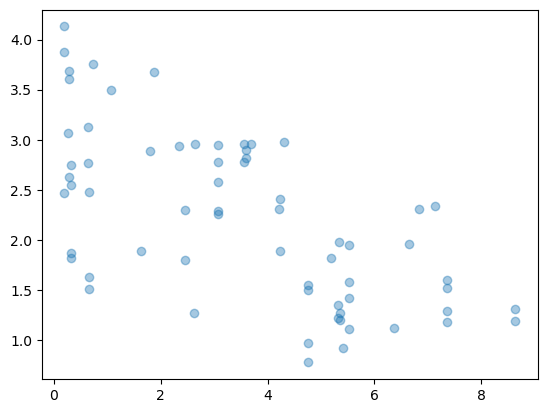

In [142]:
narea = ngtpa.Narea
lai = ngtpa.LAI

plt.scatter(lai, narea, alpha=0.4)

### Julien's TSES data LAI vs Na

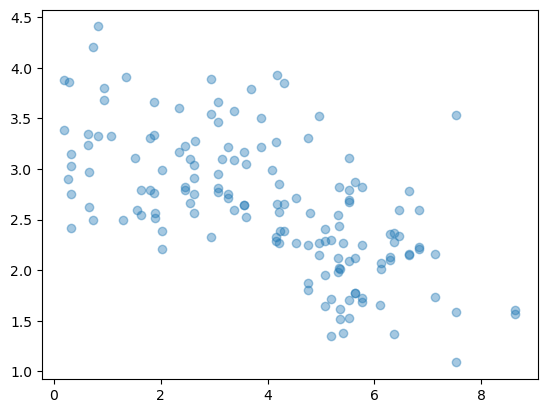

In [144]:
na = tses.Na
lai = tses.LAI

plt.scatter(lai, na, alpha=0.4)

### NGEE-Tropics Vertical Elevation vs Narea

          2
-0.01912 x + 0.08477 x + 2.399


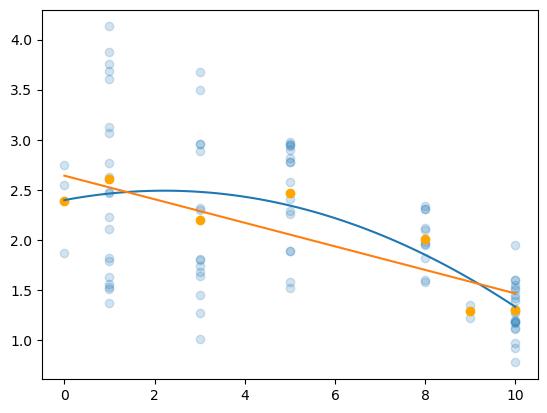

In [31]:
#print(ngtpa)

#elev0 = ngtpa.loc[:,"Vertical_Elevation"]
elev = ngtpa[ngtpa["Vertical_Elevation"] == 10]
elev = elev["Narea"].mean()
#print(elev)

means = [[0,2.39], [1,2.61], [3, 2.20], [5, 2.47], [8, 2.01], [9, 1.29], [10, 1.30]]
means = pd.DataFrame(means, columns=['Vertical_Elevation', 'Mean'])

#nmass = ngtpa.loc[:,"Nmass"]

a, b = np.polyfit(means["Vertical_Elevation"], means["Mean"], 1)
model = np.poly1d(np.polyfit(ngtpa["Vertical_Elevation"], ngtpa["Narea"], 2))

polyline = np.linspace(0, 10, 119)

plt.scatter(ngtpa["Vertical_Elevation"], ngtpa["Narea"], alpha=0.2)
plt.plot(polyline, model(polyline))

plt.plot(means["Vertical_Elevation"], a*means["Vertical_Elevation"]+b)
plt.scatter(means["Vertical_Elevation"], means["Mean"], color="orange")

print(model)

#ngtpa.plot(x="Vertical_Elevation", y='Narea', style='o', alpha=0.4)
#means.plot(x="Vertical_Elevation", y="Mean", style='o')
#plt.ylim([0, 4])

### NGEE-Tropics Vertical Elevation vs CNratio

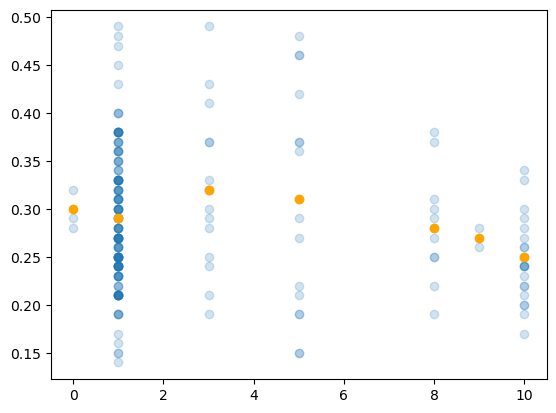

In [134]:
elev = ngtpa[ngtpa["Vertical_Elevation"] == 10]
cnrat = elev["CNratio"].mean()
#print(cnrat)

means = [[0,0.3], [1,0.29], [3, .32], [5, 0.31], [8, 0.28], [9, 0.27], [10, 0.25]]
means = pd.DataFrame(means, columns=['Vertical_Elevation', 'Mean'])

plt.scatter(ngtpa["Vertical_Elevation"], ngtpa["CNratio"], alpha=0.2)
plt.scatter(means["Vertical_Elevation"], means["Mean"], color="orange")